<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter0/NumpyAndMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.2 Introduction to the NumPy and Matplotlib libraries

In this section we introduce the *numpy* library which is used for numerical mathematics and the *matplotlib* library which is used to create plots.

## NumPy

The preferred approach for importing the *numpy* module is to preface the code with the line


In [ ]:
import numpy as np

Then a *numpy* function func is called as np.func. There are many ways to obtain help on a particular function, but perhaps the easiest is to type the function followed by a question mark. For example, to query the cosine function in *numpy* just type



In [ ]:
import numpy as np

np.cos?

A lot of numpy commands will be familiar due to your experience with MATLAB. For example, if we wanted to create a vector of evenly spaced numbers over an interval then we can use the np.linspace function.

In [ ]:
import numpy as np

a = np.linspace(0,1,5)
b = np.linspace(1,3,5)

# we can perform arithmetic on vectors of the same dimension
print('a = {}'.format(a))
print('b = {}'.format(b))
a+=b # this is equivalent to a = a + b
print('a+b = {}'.format(a))

a = [0.   0.25 0.5  0.75 1.  ]
b = [1.  1.5 2.  2.5 3. ]
a+b = [1.   1.75 2.5  3.25 4.  ]


Other similar commands exist such as np.ones and np.zeros to name but two.

In [ ]:
import numpy as np

c = np.ones(4,dtype=int)
d = np.zeros(4,dtype=int)

print('c = {}'.format(c))
print('d = {}'.format(d))

A useful resource for MATLAB users is the [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) webpage, which discusses the key differences and similarities between the two langauges.

### Arrays
Arrays will be important in this course as we commonly represent networks as matrices and use the tools of linear algebra to study their properties.

In [ ]:
import numpy as np

# defining and manipulating arrays

A = np.array([[1., 2., 3.], [4., 5., 6.]])
print('A = {}\n'.format(A))

# size
print('Dimensions of A are {}\n'.format(np.shape(A))) # 2 by 3

# (2,2) element
print('The (2,3) entry in A is given by {}\n'.format(A[1,2]))

# the second column of A
print('The second column of A is given by {}\n '.format(A[:,1]))

# A^T
print('A transpose is given by {} \n'.format(A.T))

# matrix multiplication
B = np.array([[1., 1.], [1.,1.], [1.,1.]])
print('B = {}\n'.format(B))

print('AB is given by {}'.format(A@B)) # the @ symbol denotes matrix multiplication in Python

A = [[1. 2. 3.]
 [4. 5. 6.]]

Dimensions of A are (2, 3)

The (2,3) entry in A is given by 6.0

The second column of A is given by [2. 5.]
 
A transpose is given by [[1. 4.]
 [2. 5.]
 [3. 6.]] 

B = [[1. 1.]
 [1. 1.]
 [1. 1.]]

AB is given by [[ 6.  6.]
 [15. 15.]]


For further details on array operations see the NumPy for MATLAB users link above.

Once defined, many operations on arrays are identical to MATLAB.



In [ ]:
import numpy as np

# compute sin(x) for x in [0,pi]
x = np.linspace(0,np.pi)
y = np.sin(x)

An important similarity to MATLAB is the idea of broadcasting a variable. In the following example we add the scalar 2 to a vector. Python knows to perform the addition component-wise as if we had added 2*np.ones_like(a).

In [ ]:
import numpy as np

a = np.linspace(0,1,5)
print('a = {} \n'.format(a))
print('a+2 = {}\n'.format(a+2))
print('np.ones_like(a) = {}\n'.format(np.ones_like(a))) # a vector of ones the same dimensions as the vector a
print('a+2*np.ones_like(a) = {}'.format(a+2*np.ones_like(a)))

a = [0.   0.25 0.5  0.75 1.  ] 

a+2 = [2.   2.25 2.5  2.75 3.  ]

np.ones_like(a) = [1. 1. 1. 1. 1.]

a+2*np.ones_like(a) = [2.   2.25 2.5  2.75 3.  ]


Just as with MATLAB, using for loops to manipulate large arrays can get really slow. In the following code we run the same operation twice, in the first case we use a for loop and in the second we *vectorise* the code. Play around with the size of the vector and you will see what a difference vectorising your code can have on its speed.

In [ ]:
import numpy as np

# this code smoothes a set of data points by replacing them with their average

import time # time the code

n = 1000000 # try n = 10, 100, 1000, 1000000 and higher ...
print('n = {} \n'.format(n))
f = np.linspace(0,1,n+1)

# make two copies of f
f_av1 = f.copy()
f_av2 = f.copy()

# looped code
t1 = time.time()
for i in range(1,len(f)-1):
  f_av1[i] = (f[i-1]+f[i]+f[i+1])/3.0
t2 = time.time()

print('For loop took {} seconds \n'.format(t2-t1))

# vectorised code
t3 = time.time()
f_av2[1:-1] = (f[ :-2]+f[1:-1]+f[2: ])/3.0
t4 = time.time()

print('Vectorised code took {} seconds'.format(t4-t3))

n = 1000000 

For loop took 0.4860188961029053 seconds 

Vectorised code took 0.0031461715698242188 seconds


We have only touched on the functionalities of the *numpy* library for manipulating arrays, but you shall have the opportunity to further explore *numpy* in the seminar classes as well as when performing your own network analysis later on in the course.

### Polynomials
Polynomials of a single variable can arise in the analysis of networks when studying the network *adjacency matrix*. In Python a polynomial of the form

$$
\lambda^n+c_1\lambda^{n-1}+c_2\lambda^{n-2}+\cdots+c_{n-1}\lambda+c_n
$$

can be stored as a Python *list*.

Suppose, for example that we have a network on 4 nodes whose adjacency matrix has characteristic polynomial given by

$$
\chi_A(\lambda) = \lambda^4 -6\lambda^2-8\lambda-3
$$

In [ ]:
import numpy as np

# Creating polynomials

# define by coefficients
coeffs = [1,0,-6,-8,-3]
print('The roots of the polynomial are {} \n'.format(np.roots(coeffs)))

# define by roots
roots = [3,-1,-1,-1]
print('The coefficients are given by {} '.format(np.poly(roots)))

The roots of the polynomial are [ 3.        +0.00000000e+00j -0.99999664+5.81483396e-06j
 -0.99999664-5.81483396e-06j -1.00000671+0.00000000e+00j] 

The coefficients are given by [ 1.  0. -6. -8. -3.] 


The roots of the above polynomial are $\sigma(A) = \{3,-1,-1,-1\}$.

### Linear algebra

Linear algebra is an important tool in the network scientists arsenal since we often represent networks as matrices. Our focus will be on the adjacency matrix representation but there are many others.

We will often want to compute spectral properties of networks.

In [ ]:
import numpy as np

# eigenvalues and eigenvectors

# 5 node network
A = np.array([[0,1,1,0,1],[1,1,1,0,1],[1,1,1,0,1],[0,0,0,1,0],[1,1,1,0,1]])

# compute the determinant and inverse (if possible)
d = np.linalg.det(A)
if d==0.0:
  print('The matrix is singular\n')
else:
  AI = np.linalg.inv(A)

# eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(A)
evals_srt = np.sort(evals)
eval_lg = evals_srt[-1]

print('The largest (most positive) eigenvalue is {} \n'.format(eval_lg))

# let us check Au-\lambdau = 0 for the first pair (\lambda, u)
print('checking the eigenvalue-eigenvector equation for the first eigen pair gives Ax-\lambda X = 0:\n')
eval1 = evals[0]
evec1 = evecs[:,0]
np.sum(evec1*evec1)
np.dot(A,evec1) - eval1*evec1

The matrix is singular

The largest (most positive) eigenvalue is 3.7912878474779195 

checking the eigenvalue-eigenvector equation for the first eigen pair gives Ax-\lambda X = 0:



array([1.11022302e-16, 5.55111512e-17, 5.55111512e-17, 0.00000000e+00,
       5.55111512e-17])

We will also wish to solve matrix equations such as

$$
A\mathbf{x} = \mathbf{b}
$$

mostly when considering centrality measures (I'm thinking Katz index in particular).

Below we see the code for solving the linear system above for

$$
A =\begin{pmatrix}1&2&1\\5&2&5\\1&2&3\end{pmatrix} \quad\text{ and }\quad b = \begin{pmatrix}1\\1\\-3\end{pmatrix}
$$

In [ ]:
import numpy as np

# Solving linear systems of equations

A = np.array([[1,2,1],[5,2,5],[1,2,3]])
b = np.array([1,1,-3])
x = np.linalg.solve(A,b)

print('The solution is x = {} \n'.format(x))

print('Substituting this back into the equation gives {} as expected'.format(np.dot(A,x)-b))

The solution is x = [ 2.   0.5 -2. ] 

Substituting this back into the equation gives [0. 0. 0.] as expected


Here the last line checks the solution.

As you can imagine the *numpy* module contains far more resources that those considered in this brief tutorial. Another related module is the [*scipy* module](https://scipy.org/) which provides further advanced mathematical functionalities such as special functions (Bessel functions *etc.*), optimisation routines, integration routines to solve initial value problems and much more. You may well find yourself further exploring these packages as you complete the coursework!

Other useful resources are the following [*numpy*](https://github.com/jjcrofts77/TMB-MATH34041/blob/2bd4b3af9ee58a7d52504288af55cc34ee2d3831/content/CheatSheets/Numpy_Python_Cheat_Sheet.pdf) and [*scipy*](https://github.com/jjcrofts77/TMB-MATH34041/blob/2bd4b3af9ee58a7d52504288af55cc34ee2d3831/content/CheatSheets/SciPy_Cheat_Sheet.pdf) cheat sheets which can be downloaded from my GitHub.

## Matplotlib
The *matplotlib* package is a *numpy* add-on that aims to produce publication quality graphics.

The recommended way to access the *matplotlib* library is as follows



In [ ]:
import matplotlib.pyplot as plt

plt?

This provides a MATLAB-like environment for plotting figures in Python.

### Simple figures

Below we plot the function

$$
y(x) = \sin(x)+\frac{1}{3}\cos{3x}
$$

on the range $x\in [-\pi, \pi]$.

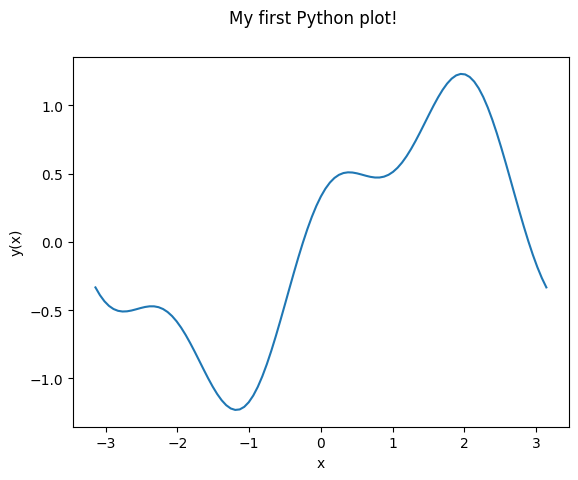

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi,101)
y = np.sin(x)+np.cos(3*x)/3.0

# plot
plt.plot(x,y)
plt.suptitle('My first Python plot!') # add a title

# add axis labels
plt.xlabel('x')
plt.ylabel('y(x)')
plt.savefig('fig1.pdf') # save figure in current directory


Hopefully the similarities with MATLAB mean that the above code is clear.

Just as with MATLAB we can add multiple plots to a single graph and format them by providing additional parameters to the plot function.

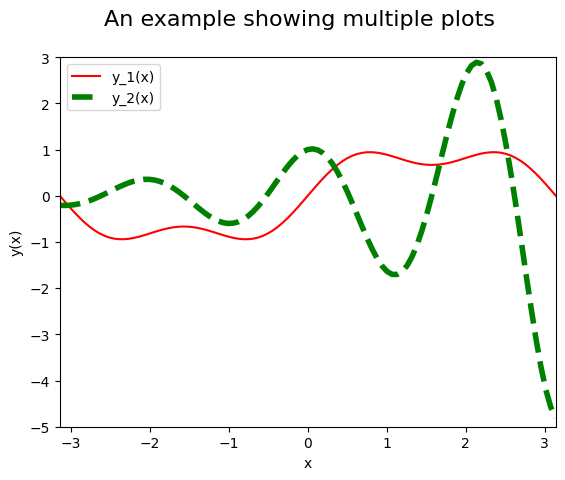

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function definitions
x = np.linspace(-np.pi,np.pi,101)
y1 = np.sin(x)+np.sin(3*x)/3.0
y2 = np.exp(x/2.0)*np.cos(3*x)

# plot
plt.plot(x,y1,'r-',label='y_1(x)') # label - legend label
plt.plot(x,y2,'g--',lw=4,label='y_2(x)') # lw - line width

# x and y limits
plt.axis([-np.pi,np.pi,-5,3]) # [xmin,xmax,ymin,ymax]

# add title and axis labels
plt.suptitle('An example showing multiple plots',size=16) # size - font size
plt.xlabel('x')
plt.ylabel('y(x)')

# add legend
plt.legend(loc='best') # add legend

plt.savefig('fig2.pdf') # save figure in current directory

Sometimes we would like to add text or annotate a figure.

A simple example using the annotate function from  *matplotlib* is given below.

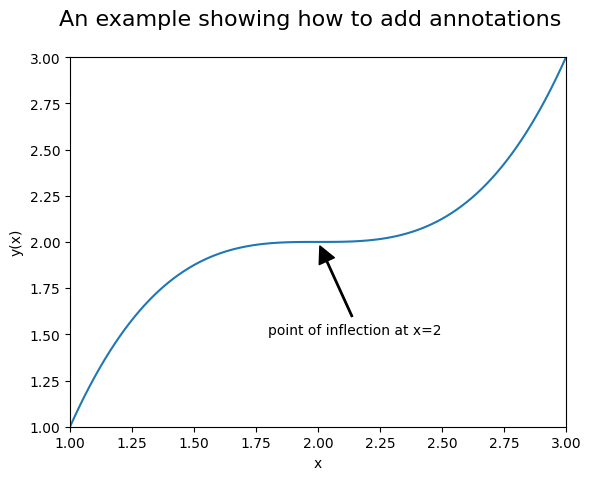

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,3,101)
y = (x-2)**3+2

# plot
plt.plot(x,y)
plt.axis([1,3,1,3])
plt.annotate('point of inflection at x=2', xy=(2,2),
             xytext=(1.8,1.5),arrowprops=dict(facecolor='black',width=1,
                                              shrink=0.05))
# add title and axis labels
plt.suptitle('An example showing how to add annotations',size=16) # size - font size
plt.xlabel('x')
plt.ylabel('y(x)')

plt.savefig('fig3.pdf') # save figure in current directory

### Compound figures

When plotting multiple figures we need to start with a blank canvas. This is done in *matplotlib* by calling the figure function. When only a single plot is being created *matplotlib* does this silently.



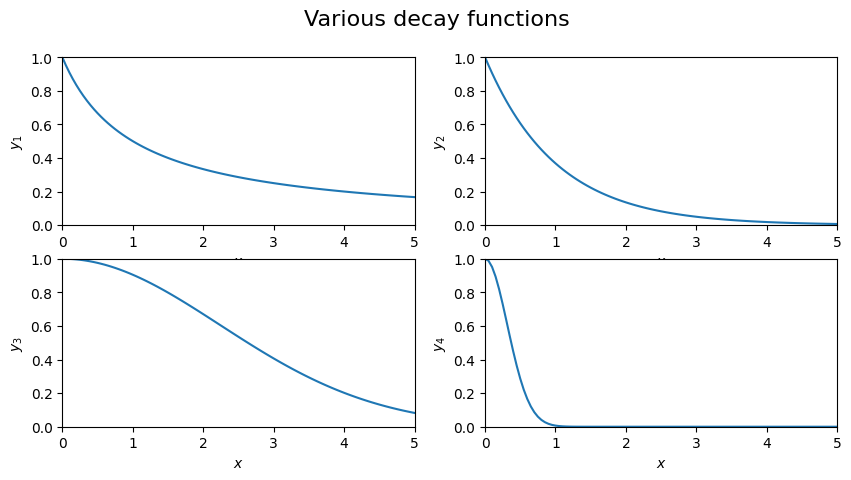

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# functions
x = np.linspace(0,5,101)
y1 = 1.0/(x+1.0)
y2 = np.exp(-x)
y3 = np.exp(-0.1*x**2)
y4 = np.exp(-5*x**2)

plt.ion() # view plot

fig1 = plt.figure() # our blank canvas (a figure class object)

fig1.set_figwidth(10) # set the figure width

# first subplot
ax1 = fig1.add_subplot(2,2,1)
ax1.plot(x,y1)
ax1.axis([0,5,0,1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y_1$') # using Latex

# second subplot
ax2 = fig1.add_subplot(2,2,2)
ax2.plot(x,y2)
ax2.axis([0,5,0,1])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y_2$')

# third subplot
ax3 = fig1.add_subplot(2,2,3)
ax3.plot(x,y3)
ax3.axis([0,5,0,1])
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y_3$')

# fourth subplot
ax4 = fig1.add_subplot(2,2,4)
ax4.plot(x,y4)
ax4.axis([0,5,0,1])
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y_4$')

fig1.suptitle('Various decay functions',size=16)
plt.tight_layout

plt.savefig('fig4.pdf') # save figure in current directory

The following [*matplotlib*](https://github.com/jjcrofts77/TMB-MATH34041/blob/2bd4b3af9ee58a7d52504288af55cc34ee2d3831/content/CheatSheets/Python_Matplotlib_Cheat_Sheet.pdf) cheat sheet may be of use!


### Animations

Perhaps the simplest way to construct an animation is to build a collection of frames (one for each time step) and then collect them into a movie. We demonstrate how to do this in the following code which captures the motion of  a special type of travelling wave known as a *soliton*.

A famous example of a differential equation that admits soliton solutions is the Korteweg-de Vries equation (or KdV):

$$
\alpha u_t +\beta uu_x+u_{xxxx} = 0
$$

If you want to learn more about these types of equations then take the third year PDEs module.

Here we are just using it to motivate solitory wave solutions, the motion of which we wish to plot.

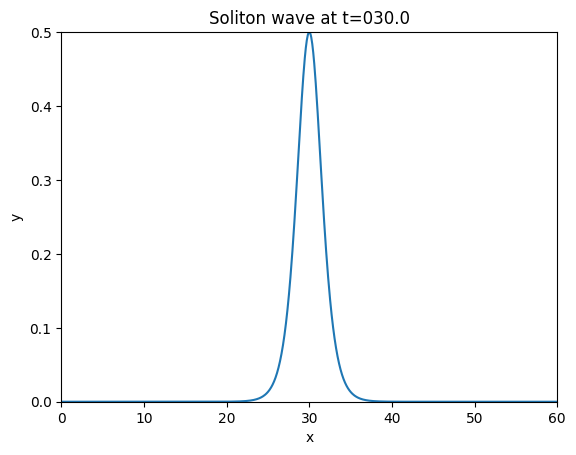

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Soliton wave animation

# soliton wave form
def sol(t,x):
  return 0.5/np.cosh(0.5*(x-t))**2

# a function for capturing frames of motion
def draw_frame(t,x):
  plt.plot(x,sol(t,x))
  plt.axis((0,60,0,0.5))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Soliton wave at t=%05.1f' % t)

x = np.linspace(0,60.0,1001)
t = np.linspace(-10,70,91) # for speed's sake I have chosen quite a small number of time-steps

# save frames as pngs
for i in range(len(t)):
  file_name = '_temp%05d.png' % i
  draw_frame(t[i],x)
  plt.savefig(file_name)
  plt.clf()

draw_frame(30,x) # plot a single frame

Above I have plotted just one frame (at $t=30$). To create the animation we need to collect all the frames together. This can be done using the ffmpeg framework which is a free command line tool for manipulating multimedia files. (don't worry if this doesn't mean much to you! We won't be using animations very much in our work.)  

In [ ]:
# use the command line to collect the frames constructed above into a movie

import os

os.system("rm_movie.mpg")
os.system("ffmpeg -r 25 " + "-i _temp%05d.png -b:v 1800 _movie.mpg")
os.system("rm _temp*.png");

You can then either download the saved movie file or you can embed it in your notebook.

For more complicated animations it is preferrable to use the bulit-in *animation package*. Below we work through an example that shows you the main steps in building an animation in this way.

### Coupled oscillator animation

The Kuramoto model is a system of $n$ ODEs that describe the time evolution, $\theta_k(t)$, of oscillating components:

$$
\dot{\theta_i} = \omega_i + \frac{K}{n}\sum_{j=1}^n a_{ij}\sin(\theta_j-\theta_i).
$$

Here, $\omega_i$ denote the natural frequencies of the oscillators, $K$ is the coupling strength and $a_{ij}$ are the entries of the adjacency matrix which denote which oscillators are connected. Note that these equations have been extensively deployed to model synchrony in the brain as well as other biological oscillators such as pace maker cells.

Here, we consider the case of $n=2$ coupled oscillators with adjacency matrix

$$
A = \begin{pmatrix}0&1\\1&0\end{pmatrix}.
$$

In this case the ODEs simplify to give

$$
\begin{align*}
\dot{\theta_1} &= \omega_1 + \epsilon\sin(\theta_2-\theta_1),\\
\dot{\theta_2} &= \omega_2 + \epsilon\sin(\theta_1-\theta_2),
\end{align*}
$$

where we have set $\epsilon = \frac{K}{2}$ for simplicity.

For $\epsilon=0$ the two oscillators will evolve independently according to their natural frequencies $\omega_1$ and $\omega_2$.

Let's animate two scenarios: a pair of uncoupled oscillators, started off at random phases $\theta_1(0), \theta_2(0)\in[0,  2\pi)$ and with natural frequencies given by

$$
\omega_1 = 1 \quad\text{and}\quad \omega_2 = 1.5;
$$

and a pair of coupled oscillators with $\epsilon = 1.0$, but otherwise identical.

To start we setup the figure environments.

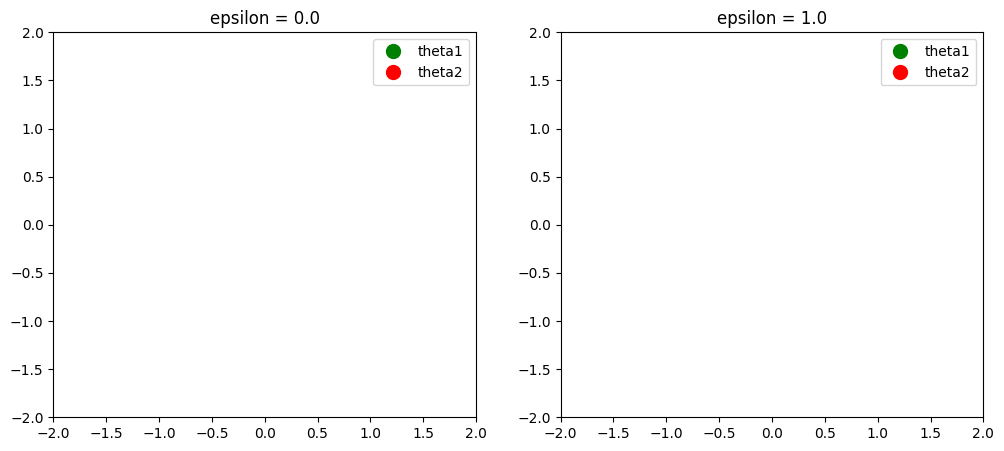

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim((-2,2))
ax1.set_ylim((-2,2))
ax1.set_title('epsilon = 0.0')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_title('epsilon = 1.0')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
pt1, = ax1.plot([], [], 'g.', ms=20)
pt2, = ax1.plot([], [], 'r.', ms=20)

pt3, = ax2.plot([], [], 'g.', ms=20)
pt4, = ax2.plot([], [], 'r.', ms=20)

ax1.legend(['theta1','theta2']);
ax2.legend(['theta1','theta2']);

Next, we need to set up, initialise and integrate the ODEs.

In [ ]:
%matplotlib inline

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# kuramoto RHS
def kuramoto_deriv(theta,t,omega,epsilon):
  w1,w2 = omega
  x,y = theta
  return w1+epsilon*np.sin(y-x),w2+epsilon*np.sin(x-y)

# Choose random starting points, uniformly distributed from 0 to 2pi
np.random.seed(1)
theta0 = 2*np.pi*np.random.random(2,)
omega = [1, 1.5]

# Solve for the trajectories
# create a time array from 0..500 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 500, dt)

epsilon = 0.0
x_t0 = integrate.odeint(kuramoto_deriv, theta0, t,args=(omega, epsilon,)) # no coupling
epsilon = 1.0
x_t1 = integrate.odeint(kuramoto_deriv, theta0, t,args=(omega, epsilon,)) # intermediate coupling

# Create a list of x and y coordinates for the unit circle to plot our phases on to
x = np.linspace(-1, 1, 1001)
y1 = np.sqrt(1 - x**2)
y2 = -np.sqrt(1 - x**2)

# Plot the unit circle
ax1.plot(x, y1,'k'), ax1.plot(x, y2,'k')
ax2.plot(x, y1,'k'), ax2.plot(x, y2,'k')

# frame at the nth time-step
def drawframe(n):
    pt1.set_data(np.sin(x_t0[n,0]),np.cos(x_t0[n,0]))
    pt2.set_data(np.sin(x_t0[n,1]),np.cos(x_t0[n,1]))
    pt3.set_data(np.sin(x_t1[n,0]),np.cos(x_t1[n,0]))
    pt4.set_data(np.sin(x_t1[n,1]),np.cos(x_t1[n,1]))
    return (pt1,pt2,pt3,pt4)

In [ ]:
from matplotlib import animation
import warnings # you can ignore this and the following line :)
warnings.filterwarnings('ignore')

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=1000, interval=20, blit=True)

In [ ]:
from IPython.display import HTML
import warnings # you can ignore this and the following line :)
warnings.filterwarnings('ignore')

# run the video in Google Colab
HTML(anim.to_html5_video())

In [9]:
from IPython.display import HTML

HTML("""
    <video width="90%" controls>
        <source src="../../../_static/kuramoto2node.mp4" type="video/mp4">
    </video>
""")

Running the code in the prevous four code blocks (in Google Colab, say) gives the above video. We see that  the uncoupled oscillators wander around the unit circle (*i.e.* oscillate) at their natural frequencies, whilst the coupled oscillators become entrained, or at least phase locked depending upon the parameter values chosen.